In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
df = pd.read_excel('Auxi Survey Data.xlsx')
df.head()


,Timestamp,Age,Gender,Income,Education,Used Freelance,Ease of aquiring freelance,Trust in freelance,Frequency of custom products,Wanted product that doesn’t exist,Benefit from customization,App interest,Matching preference,Making/buying preference,Factors
0,2019-03-04 19:25:00,18-25,Female,$150k+,Bachelor's Degree,No,"N/A, I haven't hired freelance workers before","N/A, I haven't hired freelance workers before",Never,Yes,"Home decor, Clothing, Furniture",4,Be matched,Buy it and let someone else make it,"Experience, Reputation, Portfolio/sample work,..."
1,2019-03-11 16:21:00,18-25,Female,Prefer not to say,"Some college, no degree",No,"N/A, I haven't hired freelance workers before","N/A, I haven't hired freelance workers before",Never,Yes,"Art, Home decor, Clothing, R√©sum√©s/Templates...",4,No preference,Buy it and let someone else make it,"Experience, Turnaround/shipping times, Reputat..."
2,2019-03-11 16:21:00,18-25,Female,"< $20,000","Some college, no degree",No,"N/A, I haven't hired freelance workers before","N/A, I haven't hired freelance workers before",1-2 times per month,Yes,"Art, Clothing, Furniture",4,No preference,Buy it and let someone else make it,"Experience, Reputation, Trustworthiness"
3,2019-03-11 16:24:00,18-25,Female,"$20,000-34,999","Some college, no degree",No,"N/A, I haven't hired freelance workers before","N/A, I haven't hired freelance workers before",1-2 times per month,Yes,"Art, Home decor, Clothing, R√©sum√©s/Templates...",4,Be matched,Buy it and let someone else make it,"Experience, Turnaround/shipping times, Reputat..."
4,2019-03-11 16:24:00,34-40,Female,"$20,000-34,999","Some college, no degree",No,"N/A, I haven't hired freelance workers before",Somewhat trustworthy,1-2 times per month,Yes,"Home decor, Clothing, Furniture, Jewelry",3,No preference,Buy it and let someone else make it,"Experience, Reputation, Trustworthiness, Portf..."


In [40]:
df['Age'].value_counts()

18-25    52
40-50    14
50-60     9
60+       4
26-33     3
34-40     2
<18       1
Name: Age, dtype: int64

In [41]:
df['Income'].value_counts()

$150k+               28
< $20,000            17
$100,000-149,000      9
Prefer not to say     8
$75,000-99,999        7
$20,000-34,999        7
$50,000-74,999        5
$35,000-49,999        4
Name: Income, dtype: int64

In [42]:
df['Education'].value_counts()

Some college, no degree                45
Bachelor's Degree                      20
High School or equivalent (GED)         9
Master's Degree                         6
Professional Degree (MD, DDS, etc.)     4
Associate Degree                        1
Name: Education, dtype: int64

In [24]:
agg_d = {'App interest':'mean'}
age_df = df.groupby(['Age']).agg(agg_d)

In [25]:
income_df = df.groupby('Income').agg(agg_d).sort_values('App interest', ascending = False)
income_df = income_df.reset_index()
income_df

,Income,App interest
0,"$35,000-49,999",4.000000
1,"$20,000-34,999",3.857143
2,"$100,000-149,000",3.555556
3,$150k+,3.428571
4,"$75,000-99,999",3.428571
5,"$50,000-74,999",3.400000
6,Prefer not to say,3.125000
7,"< $20,000",3.058824


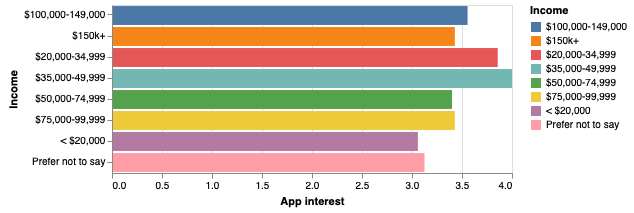

In [26]:
alt.Chart(income_df).mark_bar().encode(
    x='App interest',
    y='Income',
    color = 'Income'
)

In [27]:
education_df = df.groupby('Education').agg(agg_d)
education_df = education_df.reset_index()
education_df

,Education,App interest
0,Associate Degree,5.000000
1,Bachelor's Degree,3.550000
2,High School or equivalent (GED),3.333333
3,Master's Degree,3.333333
4,"Professional Degree (MD, DDS, etc.)",2.750000
5,"Some college, no degree",3.377778


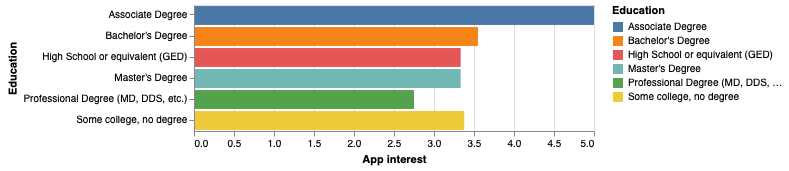

In [28]:
alt.Chart(education_df).mark_bar().encode(
    y='Education',
    x='App interest',
    color = 'Education'
)

In [29]:
used_freelance_df = df.groupby('Used Freelance').agg(agg_d)
used_freelance_df = used_freelance_df.reset_index()
used_freelance_df

,Used Freelance,App interest
0,I don't know what that is,4.000000
1,No,3.461538
2,Yes,3.281250


In [49]:
df['Used Freelance'].value_counts()

No                           52
Yes                          32
I don't know what that is     1
Name: Used Freelance, dtype: int64

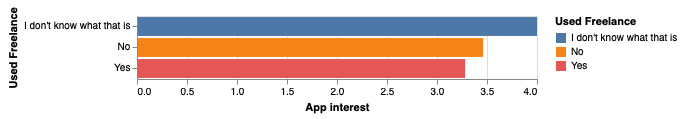

In [30]:
alt.Chart(used_freelance_df).mark_bar().encode(
    y='Used Freelance',
    x='App interest',
    color = 'Used Freelance'
)

In [45]:
gender_df = df.groupby('Gender').agg(agg_d)
gender_df = gender_df.reset_index()
gender_df

,Gender,App interest
0,Female,3.500000
1,Male,3.282051


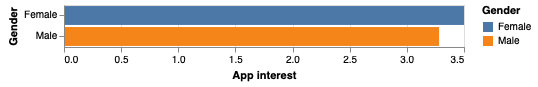

In [47]:
alt.Chart(gender_df).mark_bar().encode(
    y='Gender',
    x='App interest',
    color = 'Gender'
)

In [32]:
df['Matching preference'].value_counts()

Be matched          36
Find them myself    34
No preference       15
Name: Matching preference, dtype: int64

In [33]:
df['Making/buying preference'].value_counts()

Buy it and let someone else make it    47
Learn to make it myself                28
No preference                          10
Name: Making/buying preference, dtype: int64

In [38]:
df['Frequency of custom products'].value_counts()

Never                        41
1-2 times per month          38
3-4 times per month           3
7 or more times per month     2
5-6 times per month           1
Name: Frequency of custom products, dtype: int64